In [34]:
import pandas as pd
import geopandas as gpd

# Load and clean Palestinian census data

In [2]:
# load census data for palestianians in 2020 cook county by census tract
pal = pd.read_csv('2020_detailed_race_release/cook_palestinians_2020.csv')

In [3]:
pal.head()

,Label,Total
0,Census Tract 207.02; Cook County; Illinois,NaN
1,Palestinian alone or in any combination,NaN
2,Palestinian alone or in any combination,30.0
3,Census Tract 402.02; Cook County; Illinois,NaN
4,Palestinian alone or in any combination,NaN


In [4]:
# fill the above rows for totals
pal = pal.fillna(method='bfill')

In [5]:
pal.head()

,Label,Total
0,Census Tract 207.02; Cook County; Illinois,30.0
1,Palestinian alone or in any combination,30.0
2,Palestinian alone or in any combination,30.0
3,Census Tract 402.02; Cook County; Illinois,26.0
4,Palestinian alone or in any combination,26.0


In [6]:
# filter only census tract rows
pal = pal[pal['Label'].str.contains('Census Tract')]

In [7]:
pal.tail()

,Label,Total
417,Census Tract 8253.02; Cook County; Illinois,85.0
420,Census Tract 8253.03; Cook County; Illinois,47.0
423,Census Tract 8253.04; Cook County; Illinois,76.0
426,Census Tract 8254; Cook County; Illinois,70.0
429,Census Tract 8315; Cook County; Illinois,23.0


In [8]:
# check that it is close to 18353 which is the census county total
pal['Total'].sum()

14874.0

In [9]:
# prep census tract name col
# split label col into mult cols 
pal = pd.concat([pal['Label'].str.split(';', expand=True), pal[['Total']]], axis=1)

In [10]:
# rename
pal = pal.rename(columns={0:'census_tract', 1:'county', 2:'state', 3:'palestinian_pop'})

In [11]:
pal.head()

,census_tract,county,state,Total
0,Census Tract 207.02,Cook County,Illinois,30.0
3,Census Tract 402.02,Cook County,Illinois,26.0
6,Census Tract 814.03,Cook County,Illinois,24.0
9,Census Tract 1005,Cook County,Illinois,45.0
12,Census Tract 1007,Cook County,Illinois,31.0


In [12]:
len(pal)

144

In [13]:
pal.sort_values('Total', ascending=False)

,census_tract,county,state,Total
309,Census Tract 8237.03,Cook County,Illinois,772.0
252,Census Tract 8224,Cook County,Illinois,467.0
321,Census Tract 8238.03,Cook County,Illinois,441.0
276,Census Tract 8230.01,Cook County,Illinois,414.0
345,Census Tract 8241.06,Cook County,Illinois,386.0
...,...,...,...,...
129,Census Tract 8016.07,Cook County,Illinois,22.0
132,Census Tract 8020.02,Cook County,Illinois,22.0
165,Census Tract 8101,Cook County,Illinois,22.0
195,Census Tract 8202.02,Cook County,Illinois,22.0


Load and join geofiles

In [14]:
cook_tracts = gpd.read_file('cook_census_tracts.geojson')

In [15]:
cook_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,031,510300,17031510300,5103,Census Tract 5103,G5020,S,2958348,0,+41.7157373,-087.5749771,"POLYGON ((-87.58745 41.72327, -87.58699 41.723..."
1,17,031,520100,17031520100,5201,Census Tract 5201,G5020,S,2581898,521681,+41.7211184,-087.5294325,"POLYGON ((-87.54292 41.72391, -87.54276 41.724..."
2,17,031,590700,17031590700,5907,Census Tract 5907,G5020,S,869830,12614,+41.8260539,-087.6627888,"POLYGON ((-87.67040 41.83045, -87.67015 41.830..."
3,17,031,600400,17031600400,6004,Census Tract 6004,G5020,S,327229,0,+41.8417183,-087.6439322,"POLYGON ((-87.64645 41.84533, -87.64621 41.845..."
4,17,031,824115,17031824115,8241.15,Census Tract 8241.15,G5020,S,2683154,42699,+41.6238866,-087.8445146,"POLYGON ((-87.85386 41.63049, -87.85371 41.630..."


In [16]:
# try joining
pal_map = pd.merge(cook_tracts, pal, left_on='NAMELSAD', right_on='census_tract', how='right')

In [17]:
pal_map.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,census_tract,county,state,Total
0,17,031,020702,17031020702,207.02,Census Tract 207.02,G5020,S,704323,0,+41.9941256,-087.7048939,"POLYGON ((-87.71066 41.99737, -87.71052 41.997...",Census Tract 207.02,Cook County,Illinois,30.0
1,17,031,040202,17031040202,402.02,Census Tract 402.02,G5020,S,588657,0,+41.9798549,-087.6940960,"POLYGON ((-87.69916 41.98312, -87.69891 41.983...",Census Tract 402.02,Cook County,Illinois,26.0
2,17,031,081403,17031081403,814.03,Census Tract 814.03,G5020,S,331289,1429583,+41.8929908,-087.6209560,"POLYGON ((-87.62433 41.88903, -87.62431 41.889...",Census Tract 814.03,Cook County,Illinois,24.0
3,17,031,100500,17031100500,1005,Census Tract 1005,G5020,S,1962095,0,+41.9780453,-087.8197314,"POLYGON ((-87.83663 41.97532, -87.83662 41.975...",Census Tract 1005,Cook County,Illinois,45.0
4,17,031,100700,17031100700,1007,Census Tract 1007,G5020,S,1215251,0,+41.9721235,-087.7976295,"POLYGON ((-87.80715 41.96843, -87.80715 41.968...",Census Tract 1007,Cook County,Illinois,31.0


In [18]:
pal_map.sort_values('Total', ascending=False)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,census_tract,county,state,Total
103,17,031,823703,17031823703,8237.03,Census Tract 8237.03,G5020,S,5198056,0,+41.7188043,-087.8082530,"POLYGON ((-87.81854 41.73310, -87.81847 41.733...",Census Tract 8237.03,Cook County,Illinois,772.0
84,17,031,822400,17031822400,8224,Census Tract 8224,G5020,S,2388206,0,+41.7229415,-087.7884717,"POLYGON ((-87.79876 41.72286, -87.79861 41.722...",Census Tract 8224,Cook County,Illinois,467.0
107,17,031,823803,17031823803,8238.03,Census Tract 8238.03,G5020,S,5361944,14181,+41.6988605,-087.8279478,"POLYGON ((-87.84632 41.68548, -87.84613 41.686...",Census Tract 8238.03,Cook County,Illinois,441.0
92,17,031,823001,17031823001,8230.01,Census Tract 8230.01,G5020,S,3644304,0,+41.7069648,-087.7841873,"POLYGON ((-87.79837 41.71190, -87.79819 41.711...",Census Tract 8230.01,Cook County,Illinois,414.0
115,17,031,824106,17031824106,8241.06,Census Tract 8241.06,G5020,S,8553860,23928,+41.6183582,-087.8230168,"POLYGON ((-87.85345 41.61595, -87.85342 41.615...",Census Tract 8241.06,Cook County,Illinois,386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,17,031,801607,17031801607,8016.07,Census Tract 8016.07,G5020,S,5578921,0,+42.0894170,-087.8589238,"POLYGON ((-87.86825 42.09313, -87.86825 42.094...",Census Tract 8016.07,Cook County,Illinois,22.0
44,17,031,802002,17031802002,8020.02,Census Tract 8020.02,G5020,S,3236864,0,+42.0732542,-087.8320839,"POLYGON ((-87.84680 42.06594, -87.84680 42.066...",Census Tract 8020.02,Cook County,Illinois,22.0
55,17,031,810100,17031810100,8101,Census Tract 8101,G5020,S,723779,0,+42.0302060,-087.6846291,"POLYGON ((-87.69008 42.02695, -87.69007 42.027...",Census Tract 8101,Cook County,Illinois,22.0
65,17,031,820202,17031820202,8202.02,Census Tract 8202.02,G5020,S,21881464,882493,+41.7778184,-087.8507159,"POLYGON ((-87.88693 41.76089, -87.88681 41.760...",Census Tract 8202.02,Cook County,Illinois,22.0


In [40]:
pal_map.to_file('pal_cook_tracts_map_2020.geojson', driver='GeoJSON')

# Load all counties palestinians

In [19]:
counties = pd.read_csv('2020_detailed_race_release/all_counties_palestinians_2020.csv')

In [20]:
counties 

,Label (Grouping),Total
0,"Baldwin County, Alabama",NaN
1,Palestinian alone or in any combination,NaN
2,Palestinian alone or in any combination,22.0
3,"Calhoun County, Alabama",NaN
4,Palestinian alone or in any combination,NaN
...,...,...
1477,Palestinian alone or in any combination,NaN
1478,Palestinian alone or in any combination,128.0
1479,"Vega Baja Municipio, Puerto Rico",NaN
1480,Palestinian alone or in any combination,NaN


In [21]:
counties = counties.fillna(method='bfill')

In [22]:
counties = counties[counties['Label (Grouping)'].str.contains('County')]

In [23]:
counties.sort_values('Total', ascending=False).head(15)

,Label (Grouping),Total
381,"Cook County, Illinois",18353.0
675,"Wayne County, Michigan",4476.0
84,"Los Angeles County, California",4209.0
984,"Cuyahoga County, Ohio",4136.0
807,"Passaic County, New Jersey",3875.0
1254,"Harris County, Texas",3757.0
102,"Orange County, California",3651.0
843,"Kings County, New York",2979.0
132,"San Mateo County, California",2809.0
1326,"Fairfax County, Virginia",2599.0


In [33]:
# export counties
counties.to_csv('palestinians_by_county_2020.csv')

In [24]:
# cook vs wayne
18353/4476

4.1003127792672025

In [25]:
# suburban cook 
18353 - 3268

15085

In [26]:
15085/18353

0.8219364681523457

In [27]:
il_counties = counties[counties['Label (Grouping)'].str.contains('Illinois')].sort_values('Total', ascending=False).copy()
il_counties

,Label (Grouping),Total
381,"Cook County, Illinois",18353.0
429,"Will County, Illinois",1819.0
387,"DuPage County, Illinois",1372.0
399,"Lake County, Illinois",441.0
417,"Peoria County, Illinois",218.0
423,"St. Clair County, Illinois",214.0
378,"Champaign County, Illinois",196.0
393,"Kane County, Illinois",148.0
432,"Winnebago County, Illinois",146.0
396,"Kendall County, Illinois",126.0


In [28]:
il_counties['Total'].sum()

23510.0

In [29]:
18353.0 + 1819.0 + 1372.0

21544.0

In [30]:
# chicagoland/chicago MSA
chicagoland = ['Cook County, Illinois', 'Lake County, Illinois', 'McHenry County, Illinois', 'DeKalb County, Illinois',
              'Kane County, Illinois','DuPage County, Illinois','Kendall County, Illinois','Will County, Illinois','Grundy County, Illinois',
              'Kenosha County, Wisconsin','Lake County, Indiana','Porter County, Indiana','Jasper County, Indiana','Newton County, Indiana']

mask = counties['Label (Grouping)'].isin(chicagoland)
chicagoaland_counties = counties[mask].copy()

In [31]:
chicagoaland_counties

,Label (Grouping),Total
381,"Cook County, Illinois",18353.0
384,"DeKalb County, Illinois",45.0
387,"DuPage County, Illinois",1372.0
393,"Kane County, Illinois",148.0
396,"Kendall County, Illinois",126.0
399,"Lake County, Illinois",441.0
402,"McHenry County, Illinois",100.0
429,"Will County, Illinois",1819.0
450,"Lake County, Indiana",622.0
459,"Porter County, Indiana",83.0


In [32]:
# 2020 sum
chicagoaland_counties['Total'].sum()

23260.0

# Load and clean Israeli all counties data

In [63]:
israeli_counties = pd.read_csv('2020_detailed_race_release/all_counties_israelis_2020.csv')

In [64]:
israeli_counties = israeli_counties.fillna(method='bfill')

In [65]:
israeli_counties = israeli_counties[israeli_counties['Label (Grouping)'].str.contains('County')]

In [66]:
israeli_counties.sort_values('Total', ascending=False).head(15)

,Label (Grouping),Total
81,"Los Angeles County, California",21256.0
879,"Kings County, New York",10509.0
888,"New York County, New York",8451.0
252,"Broward County, Florida",6584.0
135,"Santa Clara County, California",5957.0
303,"Miami-Dade County, Florida",5482.0
795,"Bergen County, New Jersey",4964.0
885,"Nassau County, New York",4805.0
903,"Queens County, New York",4401.0
435,"Cook County, Illinois",3720.0


# Process Palestinian place data

In [44]:
# load
place = pd.read_csv('2020_detailed_race_release/palestinians_il_place.csv')

In [45]:
place.head()

,Label (Grouping),Total
0,"Addison village, Illinois",NaN
1,Palestinian alone or in any combination,NaN
2,Palestinian alone or in any combination,38.0
3,"Algonquin village, Illinois",NaN
4,Palestinian alone or in any combination,NaN


In [46]:
# fill the above rows for totals
place = place.fillna(method='bfill')

In [48]:
# filter only 'Illinois' tract rows
place = place[place['Label (Grouping)'].str.contains('Illinois')]

In [49]:
place['Total'] = place['Total'].astype(int) 

/tmp/ipykernel_184900/2317500152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place['Total'] = place['Total'].astype(int)


In [50]:
place.sort_values('Total', ascending=False).head(10)

,Label (Grouping),Total
45,"Chicago city, Illinois",3268
207,"Orland Park village, Illinois",2398
195,"Oak Lawn village, Illinois",1730
273,"Tinley Park village, Illinois",1361
33,"Bridgeview village, Illinois",1138
36,"Burbank city, Illinois",1070
48,"Chicago Ridge village, Illinois",926
219,"Palos Hills city, Illinois",913
111,"Hickory Hills city, Illinois",645
120,"Homer Glen village, Illinois",496


In [51]:
2398 + 1730 + 1361 + 1138

6627

In [42]:
place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 315
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   106 non-null    object
 1   Total   106 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


## Try to create a national county map of Palestinians

In [52]:
us_counties = gpd.read_file('/home/aqin/Documents/stories/geographies/us_counties_2020/tl_2020_us_county.shp')

<AxesSubplot:>

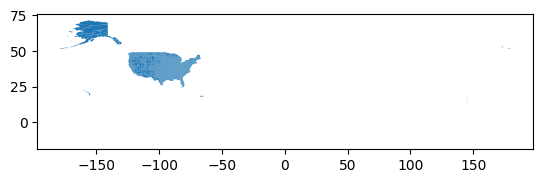

In [53]:
us_counties.plot()

In [54]:
us_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


In [55]:
# load state name to fips codes data formatted from here: https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt
state_fips = pd.read_csv('/home/aqin/Documents/stories/geographies/state_fips_codes.csv')

In [56]:
state_fips.head(3)

,FIPS,NAME,Unnamed: 2
0,1,ALABAMA,NaN
1,2,ALASKA,NaN
2,4,ARIZONA,NaN


In [57]:
# convert name to sentence case
state_fips['Name_sentence'] = state_fips['NAME'].str.title()

In [58]:
state_fips.tail(3)

,FIPS,NAME,Unnamed: 2,Name_sentence
48,54,WEST VIRGINIA,NaN,West Virginia
49,55,WISCONSIN,NaN,Wisconsin
50,56,WYOMING,NaN,Wyoming


In [63]:
us_counties['STATEFP'] = us_counties['STATEFP'].astype(int)

In [64]:
# merge state name to fips in us_counties shapefile
us_counties = pd.merge(us_counties, state_fips[['FIPS','Name_sentence']], left_on='STATEFP', right_on='FIPS')

In [69]:
# create a county name column formatted as county, state in us_counties
us_counties['formatted_county_name'] = us_counties['NAME'] + ' County, ' + us_counties['Name_sentence']

In [70]:
us_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS,Name_sentence,formatted_county_name
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,...,None,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",31,Nebraska,"Cuming County, Nebraska"
1,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,...,None,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790...",31,Nebraska,"Lancaster County, Nebraska"
2,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,...,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...",31,Nebraska,"Nuckolls County, Nebraska"
3,31,101,00835872,31101,Keith,Keith County,06,H1,G4020,None,...,None,A,2749903240,124629167,+41.1942448,-101.6444493,"POLYGON ((-101.44325 41.00318, -101.44425 41.0...",31,Nebraska,"Keith County, Nebraska"
4,31,137,00835890,31137,Phelps,Phelps County,06,H1,G4020,None,...,None,A,1398048636,1646526,+40.5163647,-099.4065568,"POLYGON ((-99.64389 40.43768, -99.64380 40.442...",31,Nebraska,"Phelps County, Nebraska"


In [72]:
# export
us_counties.to_file('/home/aqin/Documents/stories/geographies/us_counties_2020/us_counties_formatted_name.geojson', driver='GeoJSON')

In [75]:
# merge with palestinians data
palestinian_county_map = pd.merge(us_counties, counties, left_on='formatted_county_name', right_on='Label (Grouping)', how='outer')

In [76]:
# export for flourish
palestinian_county_map.to_file('palestinian_us_county_map.geojson', driver='GeoJSON')

In [77]:
palestinian_county_map.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS,Name_sentence,formatted_county_name,Label (Grouping),Total
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,...,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",31,Nebraska,"Cuming County, Nebraska",NaN,NaN
1,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,...,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790...",31,Nebraska,"Lancaster County, Nebraska","Lancaster County, Nebraska",75.0
2,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,...,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...",31,Nebraska,"Nuckolls County, Nebraska",NaN,NaN
3,31,101,00835872,31101,Keith,Keith County,06,H1,G4020,None,...,2749903240,124629167,+41.1942448,-101.6444493,"POLYGON ((-101.44325 41.00318, -101.44425 41.0...",31,Nebraska,"Keith County, Nebraska",NaN,NaN
4,31,137,00835890,31137,Phelps,Phelps County,06,H1,G4020,None,...,1398048636,1646526,+40.5163647,-099.4065568,"POLYGON ((-99.64389 40.43768, -99.64380 40.442...",31,Nebraska,"Phelps County, Nebraska",NaN,NaN


In [78]:
us_counties[us_counties['formatted_county_name'] == 'Quitman County, Georgia']

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS,Name_sentence,formatted_county_name
927,13,239,00350547,13239,Quitman,Quitman County,06,H6,G4020,None,...,None,C,391703076,24158295,+31.8629381,-085.0047978,"POLYGON ((-85.12847 31.87741, -85.12843 31.877...",13,Georgia,"Quitman County, Georgia"


In [79]:
# other way: merge county fips codes to counties df
counties_df = pd.merge(counties, us_counties[['formatted_county_name', 'STATEFP','COUNTYFP']], left_on='Label (Grouping)', right_on='formatted_county_name', how='left')

In [84]:
counties_df['full_county_fips'] = counties_df['STATEFP'].astype(str) + counties_df['COUNTYFP'].astype(str)

In [87]:
counties_df['full_county_fips'] = counties_df['full_county_fips'].str.zfill(5)

In [89]:
counties_df

,Label (Grouping),Total,formatted_county_name,STATEFP,COUNTYFP,full_county_fips
0,"Baldwin County, Alabama",22.0,"Baldwin County, Alabama",1,003,01003
1,"Calhoun County, Alabama",33.0,"Calhoun County, Alabama",1,015,01015
2,"Jefferson County, Alabama",492.0,"Jefferson County, Alabama",1,073,01073
3,"Lee County, Alabama",27.0,"Lee County, Alabama",1,081,01081
4,"Limestone County, Alabama",24.0,"Limestone County, Alabama",1,083,01083
...,...,...,...,...,...,...
455,"Outagamie County, Wisconsin",31.0,"Outagamie County, Wisconsin",55,087,55087
456,"Ozaukee County, Wisconsin",28.0,"Ozaukee County, Wisconsin",55,089,55089
457,"Racine County, Wisconsin",121.0,"Racine County, Wisconsin",55,101,55101
458,"Rock County, Wisconsin",39.0,"Rock County, Wisconsin",55,105,55105


In [90]:
# export
counties_df.to_csv('palestinians_by_county_2020_formatted_fips.csv')

In [91]:
# just chicagoland counties
chicagoland = ['Cook County, Illinois', 'Lake County, Illinois', 'McHenry County, Illinois', 'DeKalb County, Illinois',
              'Kane County, Illinois','DuPage County, Illinois','Kendall County, Illinois','Will County, Illinois','Grundy County, Illinois',
              'Kenosha County, Wisconsin','Lake County, Indiana','Porter County, Indiana','Jasper County, Indiana','Newton County, Indiana']

mask = palestinian_county_map['formatted_county_name'].isin(chicagoland)
chicagoaland_palestinian_county_map = palestinian_county_map[mask].copy()

<AxesSubplot:>

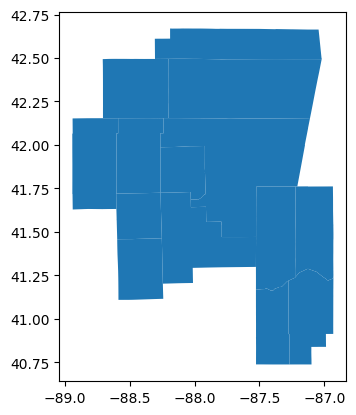

In [92]:
chicagoaland_palestinian_county_map.plot()

In [93]:
counties.head()

,Label (Grouping),Total
0,"Baldwin County, Alabama",22.0
3,"Calhoun County, Alabama",33.0
6,"Jefferson County, Alabama",492.0
9,"Lee County, Alabama",27.0
12,"Limestone County, Alabama",24.0


In [94]:
counties['Total'].sum()

165112.0